Scenario

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company.

Step 1: Ask

Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. 

Step 2: Prepare by loading the libraries

In [1]:
#loading all the library packages 
library(tidyverse)
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr)
library(skimr)
library(janitor)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Importing the dataset

In [2]:
daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv", header = TRUE)
daily_steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv", header = TRUE)
daily_sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv", header = TRUE)
hourly_steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv", header = TRUE)
hourly_calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv", header = TRUE)
hourly_intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv", header = TRUE)
weight <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv", header = TRUE)

In [3]:
head(daily_activity)
head(daily_sleep)
head(daily_steps)
head(hourly_calories)
head(hourly_intensities)
head(hourly_steps)
head(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


In [4]:
#preview the structure
str(daily_activity)
str(daily_sleep)
str(daily_steps)
str(hourly_calories)
str(hourly_intensities)
str(hourly_steps)
str(weight)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

Step 3: Process

In [5]:
#cleaning
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(daily_steps$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensities$Id)
n_distinct(hourly_steps$Id)
n_distinct(weight$Id)


[1] 33

[1] 24

[1] 33

[1] 33

[1] 33

[1] 33

[1] 8

All have 33 Id's except few of them 

In [6]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(daily_steps))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_steps))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

In [7]:
#dropping the duplicates
daily_activity <- daily_activity %>%
  distinct() %>%
  drop_na()
daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()
daily_steps <- daily_steps %>%
  distinct() %>%
  drop_na()
hourly_calories <- hourly_calories %>%
  distinct() %>%
  drop_na()
hourly_intensities<-hourly_intensities %>% distinct() %>% drop_na()
hourly_steps<-hourly_steps %>% distinct() %>% drop_na()

In [8]:
#renaming the columns
clean_names(daily_activity)
daily_activity <- rename_with(daily_activity, tolower)
clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)
clean_names(daily_steps)
daily_steps <- rename_with(daily_steps, tolower)
clean_names(hourly_calories)
hourly_calories <- rename_with(hourly_calories, tolower)
clean_names(hourly_intensities)
hourly_intensities<- rename_with(hourly_intensities,tolower)
clean_names(hourly_steps)
hourly_steps<-rename_with(hourly_steps,tolower)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_day,step_total
<dbl>,<chr>,<int>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705
1503960366,4/18/2016,13019
1503960366,4/19/2016,15506
1503960366,4/20/2016,10544


id,activity_hour,calories
<dbl>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48
1503960366,4/12/2016 6:00:00 AM,48
1503960366,4/12/2016 7:00:00 AM,47
1503960366,4/12/2016 8:00:00 AM,68


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


id,activity_hour,step_total
<dbl>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0
1503960366,4/12/2016 6:00:00 AM,0
1503960366,4/12/2016 7:00:00 AM,0
1503960366,4/12/2016 8:00:00 AM,250


In [9]:
#formatting the dates
daily_activity <- daily_activity %>%
  rename(date = activitydate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))
daily_sleep <- daily_sleep %>%
  rename(date = sleepday) %>%
  mutate(date = as.POSIXct(date, format ="%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone()))
hourly_calories <- hourly_calories %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time, format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
hourly_intensities <- hourly_intensities %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time, format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
hourly_steps<- hourly_steps %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time, format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

In [10]:
#merging dataset
daily_activity_sleep <- merge(daily_activity, daily_sleep, by=c ("id", "date"))

Step 4: Analyse 

In [11]:
daily_activity %>%  
  select(totalsteps,
         totaldistance,
         sedentaryminutes, calories) %>%
  summary()

   totalsteps    totaldistance    sedentaryminutes    calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


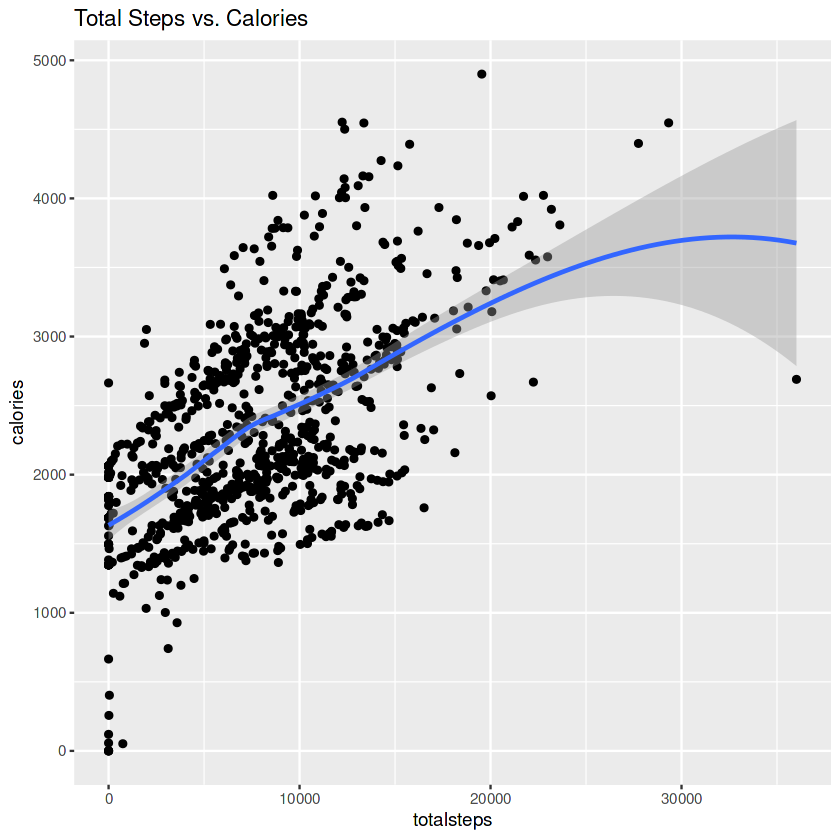

In [12]:
#plotting to see correlation
ggplot(data = daily_activity, aes(x = totalsteps, y = calories)) + 
  geom_point() + geom_smooth() + labs(title ="Total Steps vs. Calories")

Which weekday users more active

In [13]:
#to see what day of week more active users
weekday_steps <- daily_activity %>%
  mutate(weekday = weekdays(date))
weekday_steps$weekday <-ordered(weekday_steps$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                "Friday", "Saturday", "Sunday"))
weekday_steps <-weekday_steps %>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(totalsteps))

head(weekday_steps)

weekday,daily_steps
<ord>,<dbl>
Monday,7780.867
Tuesday,8125.007
Wednesday,7559.373
Thursday,7405.837
Friday,7448.230
Saturday,8152.976


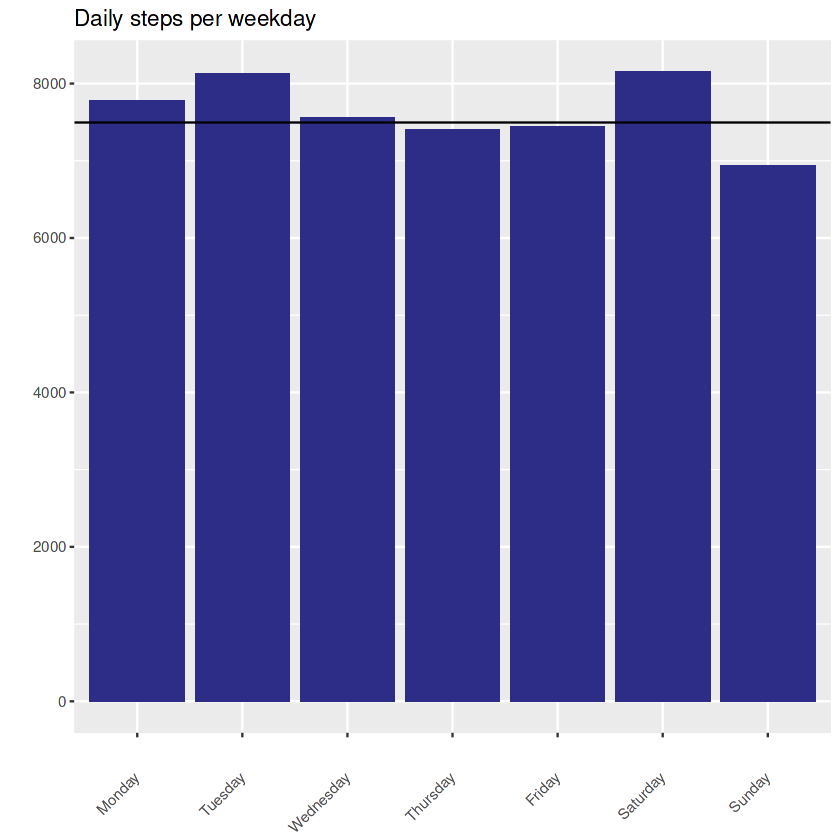

In [14]:
ggplot(weekday_steps, aes(weekday, daily_steps)) +
  geom_col(fill = "#2D2D88") +
  geom_hline(yintercept = 7500) +
  labs(title = "Daily steps per weekday", x= "", y = "") +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

Which weekday users sleep well

In [15]:
#sleep per weekday
weekday_sleep <- daily_sleep %>%
  mutate(weekday = weekdays(date))
weekday_sleep$weekday <-ordered(weekday_sleep$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                "Friday", "Saturday", "Sunday"))

weekday_sleep <-weekday_sleep %>%
  group_by(weekday) %>%
  summarize (daily_sleep = mean(totalminutesasleep))

head(weekday_sleep)

weekday,daily_sleep
<ord>,<dbl>
Monday,419.5000
Tuesday,404.5385
Wednesday,434.6818
Thursday,401.2969
Friday,405.4211
Saturday,419.0702


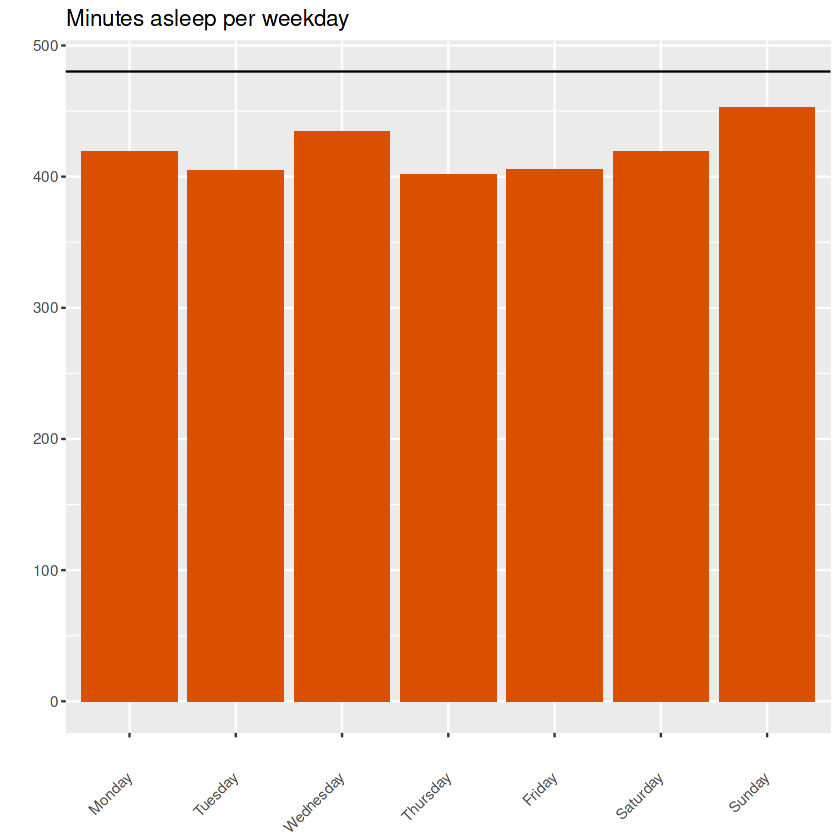

In [16]:
ggplot(weekday_sleep, aes(weekday, daily_sleep)) +
  geom_col(fill = "#db5000") +
  geom_hline(yintercept = 480) +
  labs(title = "Minutes asleep per weekday", x= "", y = "") +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

We conclude that users don’t take the recommended amount of sleep of 8 hours but take recommended number of 7500 steps a day excepts for Sundays

Hourly intensity in a day

In [17]:
#hourly intensities in a day
hourly_intensities <- hourly_intensities %>%
  separate(date_time, into = c("date", "time"), sep= " ") 

head(hourly_intensities)



,id,date,time,totalintensity,averageintensity
,<dbl>,<chr>,<chr>,<int>,<dbl>
1,1503960366,2016-04-12,00:00:00,20,0.333333
2,1503960366,2016-04-12,01:00:00,8,0.133333
3,1503960366,2016-04-12,02:00:00,7,0.116667
4,1503960366,2016-04-12,03:00:00,0,0.000000
5,1503960366,2016-04-12,04:00:00,0,0.000000
6,1503960366,2016-04-12,05:00:00,0,0.000000


In [18]:
hourly_intensities <- hourly_intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(totalintensity))

head(hourly_intensities)

time,mean_total_int
<chr>,<dbl>
00:00:00,2.1295503
01:00:00,1.4190782
02:00:00,1.0439443
03:00:00,0.4437299
04:00:00,0.6330472
05:00:00,4.9506438


Warning message in geom_histogram(stat = "identity", fill = "red"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


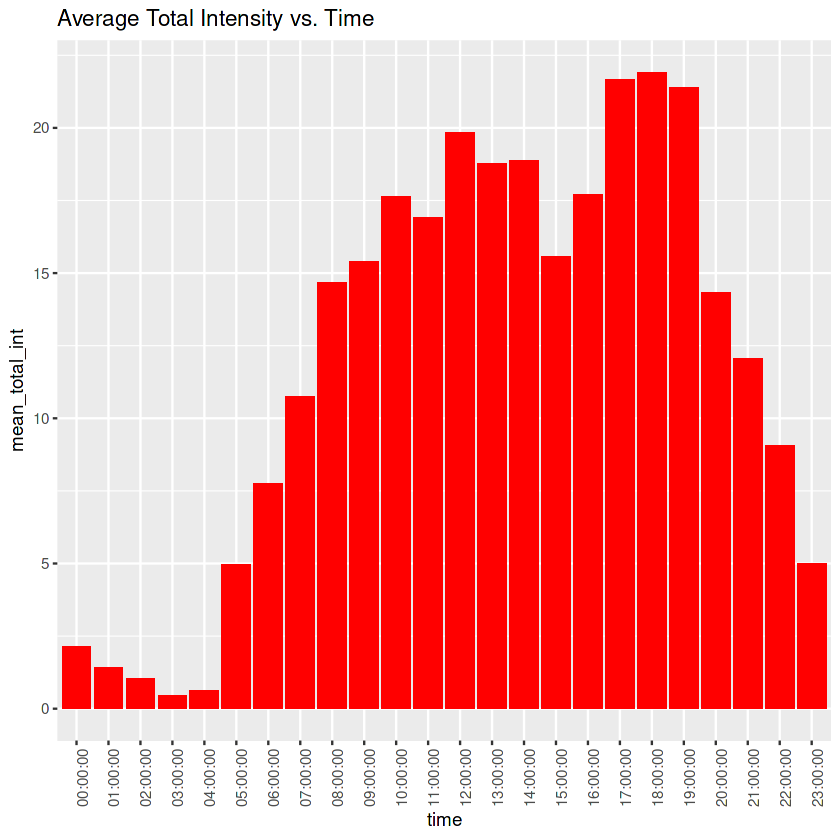

In [19]:
ggplot(data = hourly_intensities, aes(x = time, y = mean_total_int)) + geom_histogram(stat = "identity", fill='red') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

So we can say that people are more active between 5am and 11pm.
Highest intensities during 5 pm and 7 pm. Maybe they go to the gym or excersize in this part of the day. 

Hourly steps in a day

In [20]:
hourly_steps <- hourly_steps %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date)) 

head(hourly_steps)

,id,date,time,steptotal
,<dbl>,<date>,<chr>,<int>
1,1503960366,2016-04-12,00:00:00,373
2,1503960366,2016-04-12,01:00:00,160
3,1503960366,2016-04-12,02:00:00,151
4,1503960366,2016-04-12,03:00:00,0
5,1503960366,2016-04-12,04:00:00,0
6,1503960366,2016-04-12,05:00:00,0


In [21]:
hourly_steps %>%
  group_by(time) %>%
  summarize(average_steps = mean(steptotal))

time,average_steps
<chr>,<dbl>
00:00:00,42.188437
01:00:00,23.102894
02:00:00,17.110397
03:00:00,6.426581
04:00:00,12.699571
05:00:00,43.869099
06:00:00,178.508056
07:00:00,306.049409
08:00:00,427.544576


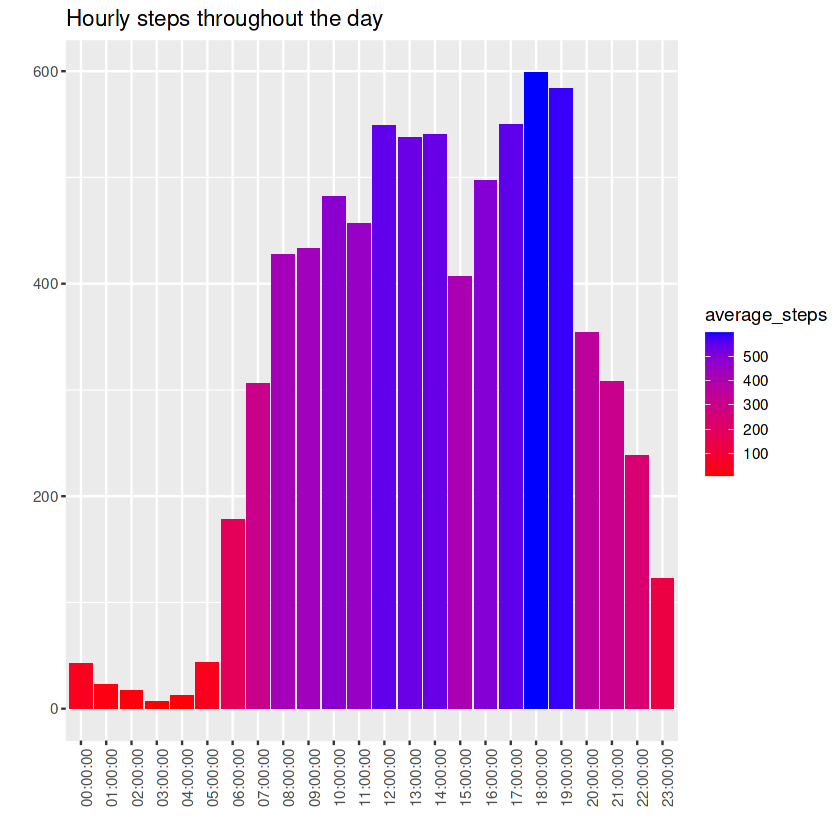

In [22]:
hourly_steps %>%
  group_by(time) %>%
  summarize(average_steps = mean(steptotal)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) + 
  labs(title = "Hourly steps throughout the day", x="", y="") + 
  scale_fill_gradient(low = "red", high = "blue")+
  theme(axis.text.x = element_text(angle = 90))

Most steps taken by women during 12pm-2pm during their break probably and after work ends during 5pm-7pm

Calculating the number of users that use their smart device on a daily basis, classifying our sample into three categories knowing that the duration of the survey is 31 days:

High user — users who use their device for 21–31 days
Moderate user — users who use their device for 10–20 days
Low user — users who use their device for 1–10 days

In [23]:
daily_use <- daily_activity_sleep %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(user_type= case_when(
    days_used >= 1 & days_used <= 10 ~ "low user",
    days_used >= 11 & days_used <= 20 ~ "moderate user", 
    days_used >= 21 & days_used <= 31 ~ "high user", 
  ))

head(daily_use)

id,days_used,user_type
<dbl>,<int>,<chr>
1503960366,25,high user
1644430081,4,low user
1844505072,3,low user
1927972279,5,low user
2026352035,28,high user
2320127002,1,low user


In [24]:
daily_use_percent <- daily_use %>%
  group_by(user_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

daily_use_percent$user_type <- factor(daily_use_percent$user_type, levels = c("high user", "moderate user", "low user"))

head(daily_use_percent)

user_type,total_percent,labels
<fct>,<dbl>,<chr>
high user,0.500,50%
low user,0.375,38%
moderate user,0.125,12%


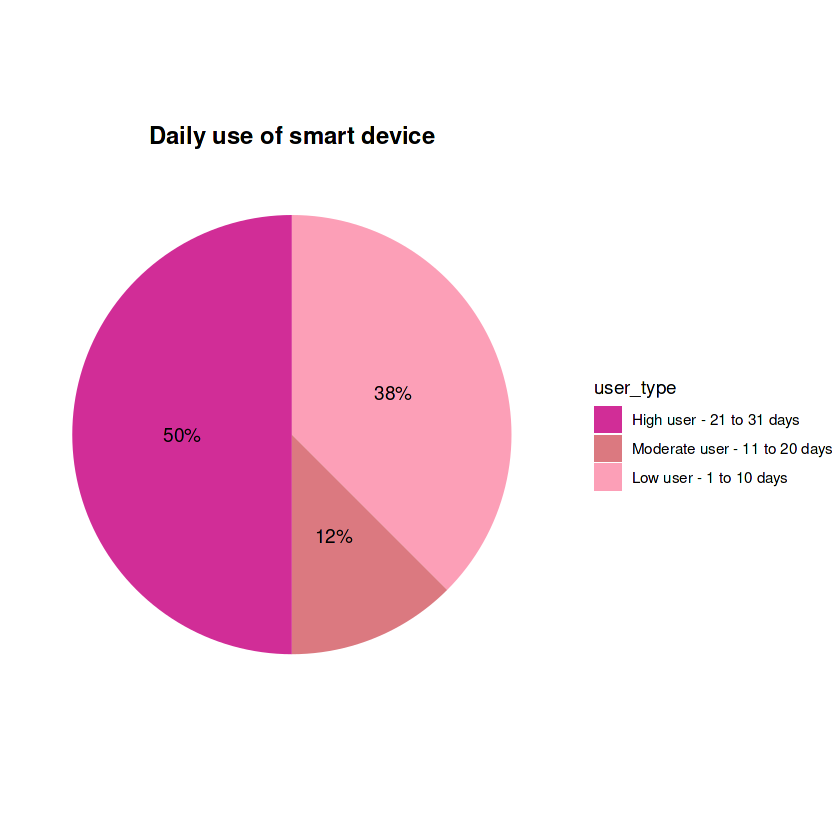

In [25]:
daily_use_percent %>%
  ggplot(aes(x = "",y = total_percent, fill = user_type)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c( "#d12d97","#db7980","#fc9fb7"),
                    labels = c("High user - 21 to 31 days",
                               "Moderate user - 11 to 20 days",
                               "Low user - 1 to 10 days"))+
  labs(title="Daily use of smart device")


**Conclusion**

* So after analysing we can select our target audience as the working women professionals who try to balance their health and work schedule. 
* Then a notification on steps taken and daily sleep is recommended cause many sleep below the requirement.
* Rewards on particular milestone achieved.